<a href="https://colab.research.google.com/github/stehrbaer/Evaluating-Soft-Actor-Critic-Agent-Performance-of-Equity-Trading-using-FinRL-/blob/main/Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Risk Analysis of DOW 30 Index** 

Using annual returns to volatility, we can assess the ratio of return-to-risks to determine what equities within the DOW-30 index show promise in terms of investing in them.


**Packages**

The following packages are necessary for the exercise:
- Numpy 
- Pandas
- MatPlotLib
- Yahoo Finance 
- Math
- Seaborn (SNS)

In [2]:
#installing and importing relevant packages
!pip install yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 951 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


**Dataset**

The dataset compromises the DOW-30 Index, which is to be used to train and trade using a Deep Learning Agent. 

Below are two datasets, one featuring the DOW-30 index equities, and one featuring select cryptocurrencies plus the index. 

In [4]:
#selected equities for comparison, equities selected from SP500 and cryptocurrencies

#dataset with DOW JONES Equities
ori_name = ["AAPL", "AMGN", "AXP", "VZ", "PG", "HON", "MRK", "CSCO", "MMM", "NKE",  "DOW", "CVX","WBA", "INTC", "JNJ", "DIS", "CAT", "MCD", "TRV", "KO", "AXP", "WMT", "UNH", "BA", "MSFT", "GS", "IBM","HD","V","JPM","CRM"]

#dataset containing cryptocurrency
#ori_name = ["AAPL", "AMGN", "AXP", "BA", "CAT", "CRM", "CSCO", "CVX", "DIS", "GS", "HD", "HON", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", "MRK", "MSFT", "NKE", "PG", "TRV", "UNH", "V", "VZ", "WBA", "WMT", "BTC-USD", "BTC-USD", "ETH-USD", "LTC-USD", "AVAX-USD", "AAVE-USD", "MKR-USD", "XRP-USD"]

stocks = yf.download(ori_name, start="2020-01-01", end="2022-08-01")

[*********************100%***********************]  30 of 30 completed


In [5]:
#cleaning and configuring dataframe
df = stocks["Close"]
dfs = df.reset_index(0)
dfn = df.set_index(pd.DatetimeIndex(dfs["Date"].values))
dfn


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2020-01-02,75.087502,240.100006,125.849998,333.320007,150.529999,166.990005,48.419998,121.430000,148.199997,53.750000,...,87.824425,160.619995,102.199997,123.410004,137.509995,292.500000,191.119995,61.049999,59.080002,118.940002
2020-01-03,74.357498,238.470001,124.599998,332.760010,148.440002,166.169998,47.630001,121.010002,146.500000,52.419998,...,87.070610,158.619995,101.919998,122.580002,137.020004,289.540009,189.600006,60.400002,59.080002,117.889999
2020-01-06,74.949997,240.300003,124.059998,333.739990,148.339996,173.449997,47.799999,120.599998,145.649994,52.209999,...,87.442749,159.029999,101.830002,122.750000,137.169998,291.549988,189.190002,60.270000,59.590000,117.650002
2020-01-07,74.597504,238.039993,123.410004,337.279999,146.380005,176.000000,47.490002,119.059998,145.699997,52.189999,...,85.114502,157.580002,101.779999,121.989998,135.160004,289.790009,188.690002,59.599998,59.290001,116.559998
2020-01-08,75.797501,238.220001,125.540001,331.369995,147.679993,177.330002,47.520000,117.699997,145.399994,52.730000,...,84.541985,160.089996,101.550003,122.510002,136.610001,295.899994,191.919998,59.709999,55.830002,116.160004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,152.949997,248.720001,153.789993,156.639999,181.809998,177.289993,44.340000,148.479996,102.690002,51.580002,...,90.529999,258.829987,109.279999,143.990005,159.979996,529.469971,214.270004,44.759998,38.750000,132.020004
2022-07-26,151.600006,251.139999,149.830002,155.919998,181.229996,170.460007,43.830002,147.320007,99.779999,51.299999,...,91.290001,251.899994,105.199997,144.270004,160.860001,531.590027,212.490005,44.919998,38.849998,121.980003
2022-07-27,156.789993,251.720001,151.630005,156.089996,185.250000,180.300003,44.639999,149.259995,103.500000,52.240002,...,91.230003,268.739990,107.860001,145.639999,158.960007,534.609985,210.470001,44.910000,39.220001,126.589996
2022-07-28,157.350006,249.750000,152.139999,159.089996,187.839996,181.289993,45.619999,150.389999,104.900002,52.299999,...,89.940002,276.410004,112.230003,148.059998,155.740005,541.489990,211.350006,45.549999,39.439999,129.750000


In [6]:
#calculating daily returns for equities 

daily_returns = df.pct_change(1)
daily_returns

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.006789,-0.009932,-0.001680,-0.013884,-0.004911,-0.016316,-0.003459,-0.011471,-0.024744,...,-0.008583,-0.012452,-0.002740,-0.006726,-0.003563,-0.010120,-0.007953,-0.010647,0.000000,-0.008828
2020-01-06,0.007968,0.007674,-0.004334,0.002945,-0.000674,0.043811,0.003569,-0.003388,-0.005802,-0.004006,...,0.004274,0.002585,-0.000883,0.001387,0.001095,0.006942,-0.002162,-0.002152,0.008632,-0.002036
2020-01-07,-0.004703,-0.009405,-0.005239,0.010607,-0.013213,0.014702,-0.006485,-0.012769,0.000343,-0.000383,...,-0.026626,-0.009118,-0.000491,-0.006191,-0.014653,-0.006037,-0.002643,-0.011117,-0.005034,-0.009265
2020-01-08,0.016086,0.000756,0.017260,-0.017523,0.008881,0.007557,0.000632,-0.011423,-0.002059,0.010347,...,-0.006726,0.015928,-0.002260,0.004263,0.010728,0.021084,0.017118,0.001846,-0.058357,-0.003432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-0.007398,0.011262,0.005098,-0.009611,0.017859,-0.028388,-0.002699,0.029752,-0.000292,0.014356,...,0.004661,-0.005876,0.001466,0.006782,0.022759,0.015458,0.002667,0.006974,0.002328,-0.001437
2022-07-26,-0.008826,0.009730,-0.025749,-0.004597,-0.003190,-0.038524,-0.011502,-0.007812,-0.028338,-0.005429,...,0.008395,-0.026774,-0.037335,0.001945,0.005501,0.004004,-0.008307,0.003575,0.002581,-0.076049
2022-07-27,0.034235,0.002309,0.012014,0.001090,0.022182,0.057726,0.018480,0.013169,0.037282,0.018324,...,-0.000657,0.066852,0.025285,0.009496,-0.011811,0.005681,-0.009506,-0.000223,0.009524,0.037793


In [7]:
#calculating annual returns for equities
annual_returns = daily_returns.mean()*252
annual_returns

AAPL    0.368552
AMGN    0.052374
AXP     0.188402
BA     -0.085680
CAT     0.172346
CRM     0.134190
CSCO    0.027447
CVX     0.215714
DIS    -0.059239
DOW     0.098275
GS      0.213800
HD      0.179606
HON     0.078519
IBM     0.054205
INTC   -0.109349
JNJ     0.095247
JPM    -0.001264
KO      0.093054
MCD     0.146269
MMM    -0.047871
MRK     0.041753
MSFT    0.277356
NKE     0.111708
PG      0.077140
TRV     0.118676
UNH     0.300204
V       0.099946
VZ     -0.086797
WBA    -0.085376
WMT     0.074795
dtype: float64

In [8]:
#calculating and sorting annual risk for equities
annual_risks = daily_returns.std() * math.sqrt(252)
annual_risks

sorted_annual_risks = annual_risks.sort_values(ascending = False)
sorted_annual_risks

BA      0.634692
AXP     0.473270
DOW     0.449078
CVX     0.443511
CRM     0.441976
INTC    0.425041
JPM     0.393421
GS      0.392004
DIS     0.377530
WBA     0.374049
AAPL    0.369297
NKE     0.364908
CAT     0.360301
TRV     0.350226
MSFT    0.346662
UNH     0.345789
V       0.345377
HD      0.334642
HON     0.329572
CSCO    0.323684
IBM     0.315861
MMM     0.286228
AMGN    0.286177
MCD     0.285872
MRK     0.264924
WMT     0.261320
KO      0.256090
PG      0.249812
JNJ     0.227539
VZ      0.208307
dtype: float64

In [9]:
sorted_annual_returns = annual_returns.sort_values(ascending = False)
sorted_annual_returns

AAPL    0.368552
UNH     0.300204
MSFT    0.277356
CVX     0.215714
GS      0.213800
AXP     0.188402
HD      0.179606
CAT     0.172346
MCD     0.146269
CRM     0.134190
TRV     0.118676
NKE     0.111708
V       0.099946
DOW     0.098275
JNJ     0.095247
KO      0.093054
HON     0.078519
PG      0.077140
WMT     0.074795
IBM     0.054205
AMGN    0.052374
MRK     0.041753
CSCO    0.027447
JPM    -0.001264
MMM    -0.047871
DIS    -0.059239
WBA    -0.085376
BA     -0.085680
VZ     -0.086797
INTC   -0.109349
dtype: float64

In [10]:
#creating dataframes to measure returns vs. volatility by tickers
df2 = pd.DataFrame()

df2["Expected Annual Returns"] = annual_returns
df2["Expected Annual Risk"] = annual_risks
df2["Ticker"] = df2.index
df2["Ratio"] = df2["Expected Annual Returns"] / df2["Expected Annual Risk"]


combine = pd.DataFrame({'returns': annual_returns,
                       'volatility': annual_risks})

combine


,returns,volatility
AAPL,0.368552,0.369297
AMGN,0.052374,0.286177
AXP,0.188402,0.473270
BA,-0.085680,0.634692
CAT,0.172346,0.360301
CRM,0.134190,0.441976
CSCO,0.027447,0.323684
CVX,0.215714,0.443511
DIS,-0.059239,0.377530
DOW,0.098275,0.449078


**Table**

The table below shows the annual return to risk ratio, highlighting that equities such as AAPL, UNH, MSFT, GS, HD, MCD show more favorable risk characteristics than equities at the bottom of the list

This can be seen in graphical depiction in two plots below.

In [11]:
df2.sort_values(by="Ratio", ascending = False)


,Expected Annual Returns,Expected Annual Risk,Ticker,Ratio
AAPL,0.368552,0.369297,AAPL,0.997984
UNH,0.300204,0.345789,UNH,0.868173
MSFT,0.277356,0.346662,MSFT,0.800075
GS,0.213800,0.392004,GS,0.545404
HD,0.179606,0.334642,HD,0.536711
MCD,0.146269,0.285872,MCD,0.511660
CVX,0.215714,0.443511,CVX,0.486379
CAT,0.172346,0.360301,CAT,0.478339
JNJ,0.095247,0.227539,JNJ,0.418598
AXP,0.188402,0.473270,AXP,0.398085


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


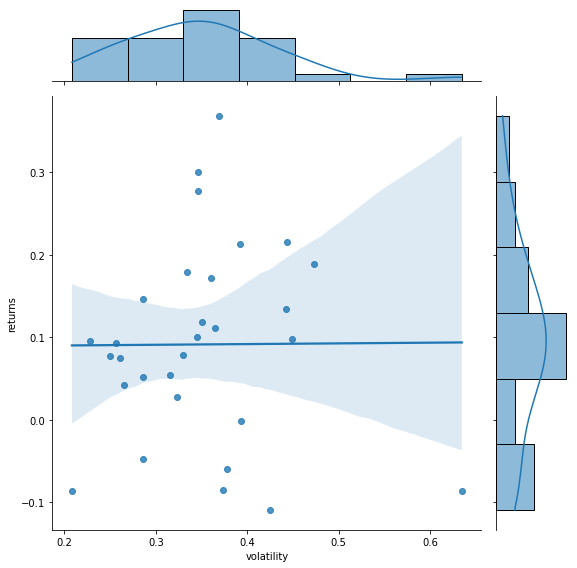

In [12]:
import seaborn as sns
#using seaborn to plot returns vs. volatility
g = sns.jointplot("volatility", "returns", data=combine, kind="reg",height=8)


    
plt.show()

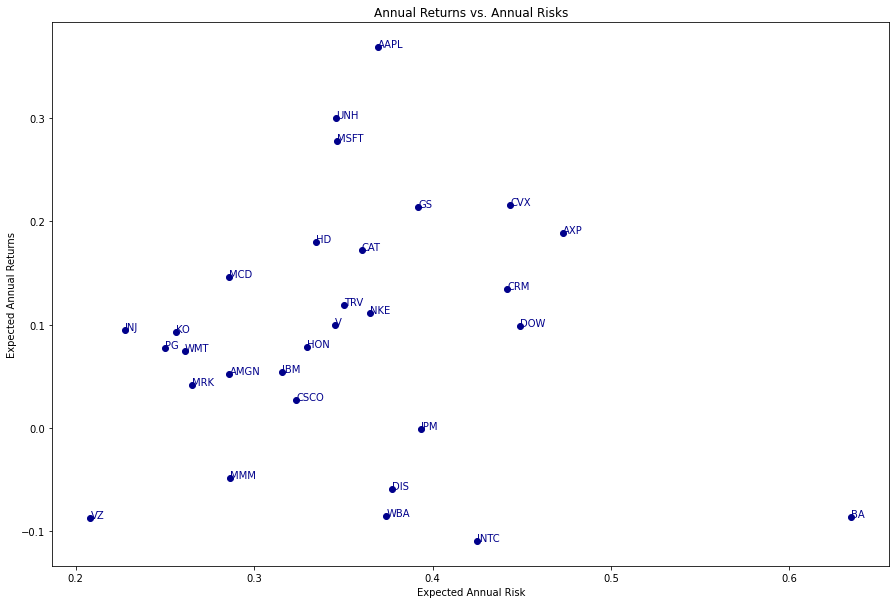

In [13]:
#plotting risks vs returns with equity names to explain seaborn plot using indicators 

#Favourable stocks appear toward the top right area, whereas unfavorable stocks appear toward the bottom left / bottom right area

fig, ax = plt.subplots(figsize=(15,10))
plt.title("Annual Returns vs. Annual Risks")
ax.scatter(df2["Expected Annual Risk"], df2["Expected Annual Returns"], c = 'DarkBlue')
ax.set_xlabel("Expected Annual Risk")
ax.set_ylabel("Expected Annual Returns")
for idx, row in df2.iterrows():
  ax.annotate(row["Ticker"], (row["Expected Annual Risk"], row["Expected Annual Returns"]), c = "DarkBlue")
plt.show()
